In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from IPython.display import Image
import pydot
import pydotplus

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
import os

In [10]:
# iris 데이터의 Species를 분류하는 의사결정나무 분석을 실시하고 오분류표를 만들어보자
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target

In [11]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X,y,stratify = y, train_size = 0.7, test_size = 0.3, random_state = 123)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(105, 4) (45, 4) (105,) (45,)


In [12]:
# 의사결정나무 모델 실행
iris_clf = DecisionTreeClassifier(max_depth = 5)
iris_clf = iris_clf.fit(train_x, train_y)
iris_prediction = iris_clf.predict(test_x)

In [13]:
feature_columns = iris.feature_names 

In [14]:
feature_columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

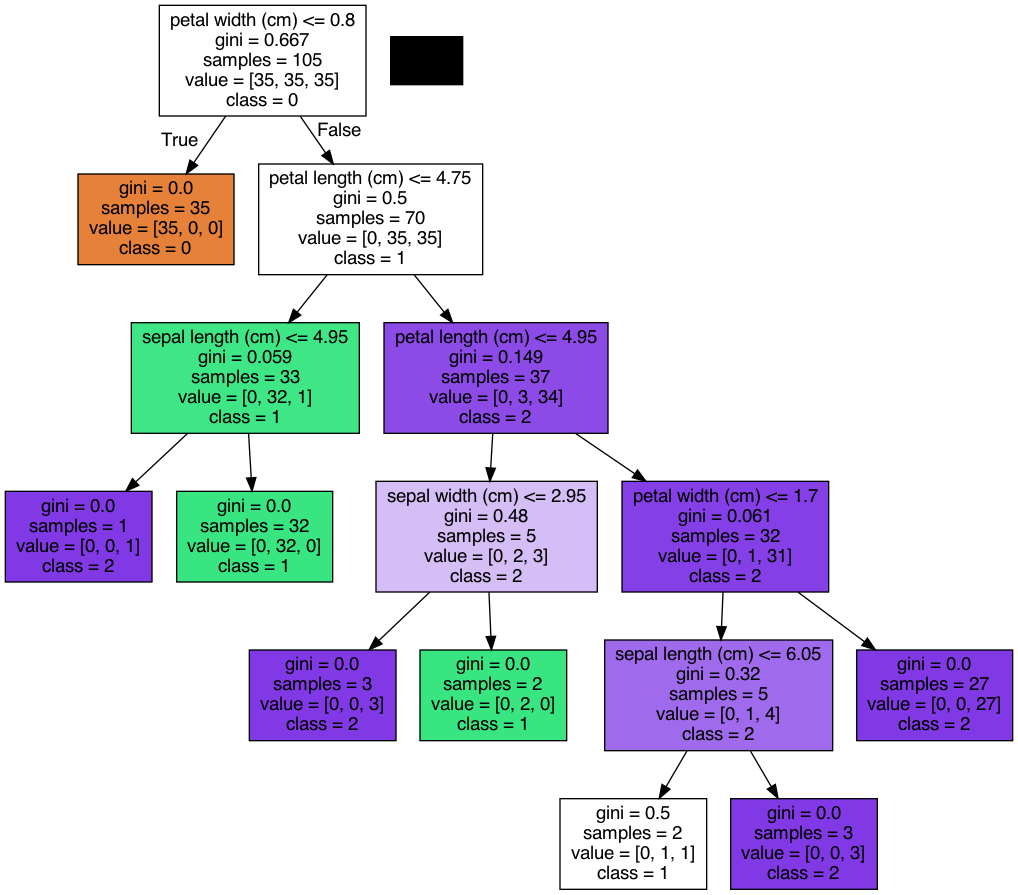

In [16]:
# 의사결정나무 시각화
# 시각화 라이브러리에 삽입해야하는 변수 생성하기
# 원본 데이터의 변수 이름을 추출하고, 타겟 변수 이름을 0, 1로 설정
from sklearn import tree
feature_names = feature_columns
target_name = np.array(['0','1','2'])

# Graphviz로 의사결정나무 시각화하기
dt_dot_data = tree.export_graphviz(iris_clf, feature_names = feature_names, class_names = target_name,
                    filled=True, max_depth = 5) # filled=True 색

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

Image(dt_graph.create_png())

# 지니지수가 0으로 되는 것부터 분류, 위에서부터 기준이 되는 변수(petel length)가 중요
# petal length가 분류하는데 영향을 많이 미쳤다. 리프노드 중점

In [17]:
# 분류 리포트 생성하기
class_report_iris = classification_report(test_y, iris_prediction)
print(class_report_iris)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.85      0.73      0.79        15
           2       0.76      0.87      0.81        15

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



In [18]:
from sklearn.metrics import roc_auc_score

In [19]:
iris_clf.predict_proba(test_x)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [20]:
roc_auc_score(test_y, iris_clf.predict_proba(test_x), multi_class='ovr')

0.9

In [ ]:
# 2021년 12월 기준 시험장의 graphviz version 0.10 > 안나올 가능성이 높다. 홈페이지 들어가서 시험장 버전 체크 필요.
# 버전이 변경되었으면, 시험에 나올 가능성이 높다.